# Linear Regression drop Volume

In [110]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline


In [127]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])

In [128]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1464566400,544.18,512.81,516.05,77528.43,4.143317e+07,532.26,direct,
1,1464652800,546.92,513.15,532.26,114080.03,6.089641e+07,528.92,direct,
2,1464739200,542.26,521.30,528.92,72406.45,3.874266e+07,537.40,direct,
3,1464825600,541.55,530.47,537.40,52877.98,2.838070e+07,537.10,direct,
4,1464912000,573.72,534.34,537.10,106250.27,5.946431e+07,567.03,direct,
...,...,...,...,...,...,...,...,...,...
1996,1637020800,63614.53,58745.71,63614.06,61509.16,3.740808e+09,60108.90,direct,
1997,1637107200,60837.09,58566.05,60108.90,43164.90,2.582738e+09,60365.60,direct,
1998,1637193600,60964.37,56535.61,60365.60,63523.43,3.718547e+09,56930.68,direct,
1999,1637280000,58403.92,55655.03,56930.68,36833.38,2.107345e+09,58136.22,direct,


In [129]:
df = df.drop(['conversionType', 'conversionSymbol'], axis = 1)

In [130]:
df = df.drop('time', axis = 1)

In [131]:
df.head()

,high,low,open,volumefrom,volumeto,close
0,544.18,512.81,516.05,77528.43,41433165.43,532.26
1,546.92,513.15,532.26,114080.03,60896411.69,528.92
2,542.26,521.30,528.92,72406.45,38742660.86,537.40
3,541.55,530.47,537.40,52877.98,28380698.71,537.10
4,573.72,534.34,537.10,106250.27,59464310.87,567.03


In [132]:
df.tail()

,high,low,open,volumefrom,volumeto,close
1996,63614.53,58745.71,63614.06,61509.16,3.740808e+09,60108.90
1997,60837.09,58566.05,60108.90,43164.90,2.582738e+09,60365.60
1998,60964.37,56535.61,60365.60,63523.43,3.718547e+09,56930.68
1999,58403.92,55655.03,56930.68,36833.38,2.107345e+09,58136.22
2000,59044.97,58022.39,58136.22,3692.58,2.166566e+08,58463.50


In [133]:
test_df = df[-30:]

In [134]:
test_df

,high,low,open,volumefrom,volumeto,close
1971,63731.17,60017.23,62283.96,40476.42,2.504718e+09,60693.59
1972,61733.43,59705.11,60693.59,16232.50,9.903601e+08,61313.09
1973,61481.25,59529.34,61313.09,19158.07,1.158839e+09,60863.56
1974,63709.97,60658.35,60863.56,24693.91,1.549309e+09,63089.04
1975,63290.04,59868.68,63089.04,28107.19,1.738003e+09,60315.68
1976,61473.00,58128.18,60315.68,45852.35,2.719093e+09,58464.42
1977,62252.08,58145.43,58464.42,51251.10,3.090103e+09,60610.11
1978,62967.45,60269.97,60610.11,35214.62,2.168021e+09,62282.50
1979,62371.52,60774.38,62282.50,15917.35,9.799871e+08,61891.91
1980,62420.57,60022.06,61891.91,19359.29,1.181934e+09,61349.75


In [135]:
X_test = test_df.iloc[:, [0, 1, 2, 3, 4]].values
y_test = test_df.iloc[:, [5]].values

In [136]:
train_df = df[:len(df)-30]

In [137]:
X = train_df.iloc[:, [0, 1, 2, 3, 4]].values
y = train_df.iloc[:, [5]].values

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [139]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [140]:
multiple_linear_r2_confidence = regressor.score(X_val, y_val)
print("multiple linear accuracy(r2): ", multiple_linear_r2_confidence)

multiple linear accuracy(r2):  0.9993343694110791


In [141]:
# Print the predicted value
y_val_prediction = regressor.predict(X_val)


print()

#Print the actual values
y_val 

array([[57359.21],
       [15599.92],
       [14392.57],
       [34252.08],
       [ 9523.75],
       [15313.73],
       [38387.36],
       [ 8754.69],
       [  894.41],
       [ 2878.49],
       [ 9450.47],
       [32820.5 ],
       [49088.1 ],
       [ 3947.74],
       [64283.97],
       [ 9221.61],
       [ 6612.36],
       [  741.07],
       [ 9424.62],
       [ 8106.56],
       [ 2234.17],
       [35515.38],
       [11767.74],
       [ 1975.08],
       [  580.66],
       [ 8071.04],
       [ 2536.46],
       [ 7973.63],
       [  624.52],
       [ 6250.85],
       [ 7316.23],
       [10491.96],
       [ 1135.41],
       [ 1264.31],
       [ 1171.91],
       [ 4573.8 ],
       [  654.74],
       [ 5047.23],
       [14398.7 ],
       [ 7643.44],
       [ 7357.5 ],
       [10326.25],
       [ 9808.18],
       [ 9697.86],
       [  995.36],
       [ 4161.66],
       [ 8640.42],
       [ 9380.67],
       [ 8247.91],
       [ 9579.71],
       [ 7264.29],
       [ 5513.08],
       [  91

In [142]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

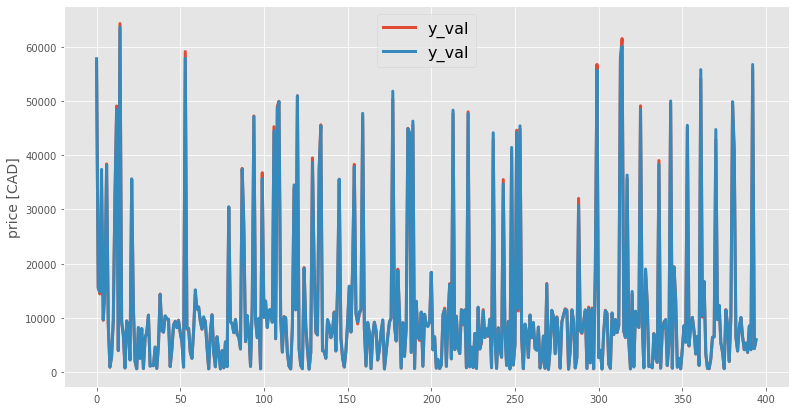

In [143]:
line_plot(y_val, y_val_prediction, 'y_val', 'y_val', lw=3)

In [144]:
X_train_r2 = X_train[:, [2]]

In [145]:
r2_train = regressor.score(X_train, y_train)

In [146]:
y_train_pred = regressor.predict(X_train)

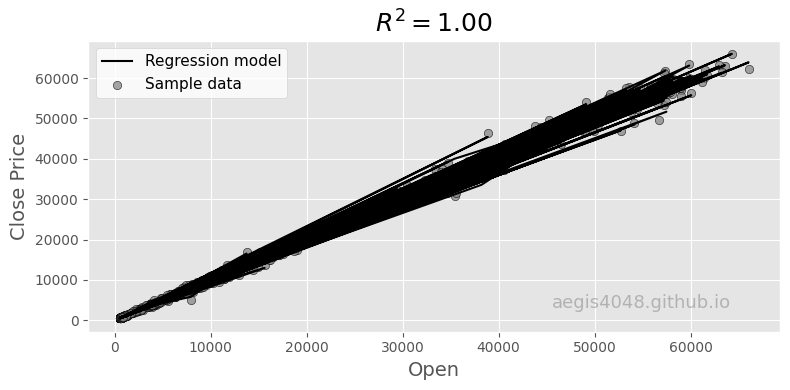

In [147]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_r2, y_train_pred, color='k', label='Regression model')
ax.scatter(X_train_r2, y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Close Price', fontsize=14)
ax.set_xlabel('Open', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2_train, fontsize=18)

fig.tight_layout()

In [148]:
# Print the predicted value
y_prediction = regressor.predict(X_test)


print()

#Print the actual values
y_test 

array([[60693.59],
       [61313.09],
       [60863.56],
       [63089.04],
       [60315.68],
       [58464.42],
       [60610.11],
       [62282.5 ],
       [61891.91],
       [61349.75],
       [60960.98],
       [63260.05],
       [62929.93],
       [61448.47],
       [61019.66],
       [61529.76],
       [63302.78],
       [67549.14],
       [66939.24],
       [64926.06],
       [64820.8 ],
       [64156.3 ],
       [64409.56],
       [65509.06],
       [63614.06],
       [60108.9 ],
       [60365.6 ],
       [56930.68],
       [58136.22],
       [58463.5 ]])

In [149]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[61851.22437123 60693.59      ]
 [60603.85229365 61313.09      ]
 [59947.15289862 60863.56      ]
 [62931.70157085 63089.04      ]
 [60832.94282789 60315.68      ]
 [59727.18921107 58464.42      ]
 [61474.16600055 60610.11      ]
 [62242.7873992  62282.5       ]
 [61006.31701205 61891.91      ]
 [60776.72240774 61349.75      ]
 [60905.68215381 60960.98      ]
 [63473.5608024  63260.05      ]
 [61788.68909343 62929.93      ]
 [61315.99664835 61448.47      ]
 [61725.36384393 61019.66      ]
 [60587.65224382 61529.76      ]
 [62652.27188902 63302.78      ]
 [67009.24512194 67549.14      ]
 [67325.63411048 66939.24      ]
 [66086.49666472 64926.06      ]
 [64657.29605591 64820.8       ]
 [63464.14689865 64156.3       ]
 [63983.88901165 64409.56      ]
 [64470.33872603 65509.06      ]
 [64546.234979   63614.06      ]
 [60307.16484499 60108.9       ]
 [59573.73476742 60365.6       ]
 [58300.98384254 56930.68      ]
 [57184.55317448 58136.22      ]
 [58452.44906515 58463.5       ]]


In [150]:
from sklearn.metrics import max_error

mre = max_error(y_test, y_prediction)
print("Maximum Residual Error :", mre)

Maximum Residual Error : 1370.3038425408085


In [151]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print("Mean absolute Error :", mae)

Mean absolute Error : 652.8661022332933


In [152]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squered Error :", mse)

Mean Squered Error : 582673.2352614781


In [153]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_prediction)
print("Mean absolute percentage error : ", mape)

Mean absolute percentage error :  0.010591572838073032


# Making R2 Matrix

In [154]:
X_test_r2 = X_test[:, [2]]

In [155]:
X_test_r2.shape

(30, 1)

In [156]:
y_test.shape

(30, 1)

In [157]:
r2 = regressor.score(X_test, y_test)

In [158]:
r2

0.9058005912261958

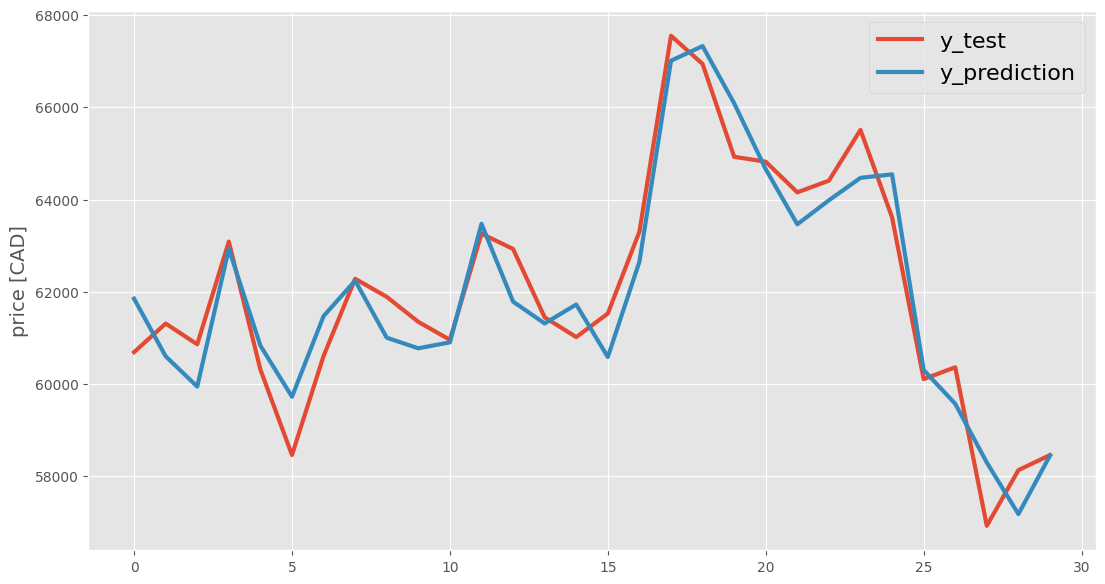

In [159]:
line_plot(y_test, y_prediction, 'y_test', 'y_prediction', lw=3)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_prediction)
print("Mean absolute percentage error : ", mape)